In [1]:
#jk
import os
import glob
from tqdm.notebook import tqdm_notebook
import logging as lg
import pickle

import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.metrics import precision_score,recall_score,f1_score,confusion_matrix,roc_curve,roc_auc_score,classification_report

sns.set(rc={'figure.figsize':(20,7)})

In [2]:
def create_sub_dir_list(parent_dir_path):
    for root, dirs, files in os.walk(parent_dir_path):
        subdir_path_list = [os.path.join(root, name) for name in dirs]
        return subdir_path_list

In [3]:
parent_dir_path = 'R:/ML_New/FullStackDS/projects/ML/old_people_activity_recognition_classification/data'
subdir_path_list = create_sub_dir_list(parent_dir_path)
subdir_path_list

['R:/ML_New/FullStackDS/projects/ML/old_people_activity_recognition_classification/data\\S1_Dataset',
 'R:/ML_New/FullStackDS/projects/ML/old_people_activity_recognition_classification/data\\S2_Dataset']

In [4]:
def load_data(subdir_path_list):

    column_names = ['time(s)', 'frontal_axis', 'vertical_axis', 'lateral_axis', 'antenna_id', 'rssi','phase', \
                    'frequency', 'label', 'gender']
    sub_df_list = []

    for subdir_path in tqdm_notebook(subdir_path_list):

        for file in glob.glob(os.path.join(subdir_path, 'd*')):
            gender = file[-1]
            tmp_df = pd.read_csv(file, error_bad_lines=False, header = None)
            tmp_df['gender'] = gender
            sub_df_list.append(tmp_df)

    combined_df = pd.concat(sub_df_list)
    combined_df.columns = column_names
    combined_df.reset_index(inplace=True, drop=True)
    
    return combined_df
    
#Label of activity, 1: sit on bed, 2: sit on chair, 3: lying, 4: ambulating

In [5]:
combined_df = load_data(subdir_path_list)
combined_df.head()

  0%|          | 0/2 [00:00<?, ?it/s]

C:\Users\jagan\AppData\Local\Temp/ipykernel_1212/2494456588.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  combined_df = load_data(subdir_path_list)


,time(s),frontal_axis,vertical_axis,lateral_axis,antenna_id,rssi,phase,frequency,label,gender
0,0.00,0.27203,1.00820,-0.082102,1,-63.5,2.4252,924.25,1,M
1,0.50,0.27203,1.00820,-0.082102,1,-63.0,4.7369,921.75,1,M
2,1.50,0.44791,0.91636,-0.013684,1,-63.5,3.0311,923.75,1,M
3,1.75,0.44791,0.91636,-0.013684,1,-63.0,2.0371,921.25,1,M
4,2.50,0.34238,0.96229,-0.059296,1,-63.5,5.8920,920.25,1,M


In [41]:
combined_df[combined_df['label'] == 3]

,time(s),frontal_axis,vertical_axis,lateral_axis,antenna_id,rssi,phase,frequency,label,gender
55,37.75,1.069400,0.296270,-0.013684,4,-67.0,1.032400,925.75,3,1.0
56,38.00,1.069400,0.296270,-0.013684,3,-50.0,5.092800,923.75,3,1.0
57,38.10,1.069400,0.296270,-0.013684,4,-67.0,5.798400,923.75,3,1.0
58,38.50,0.823120,-0.071196,-0.104910,3,-53.0,0.477070,925.25,3,1.0
59,38.75,1.057600,-0.289380,-0.036490,3,-50.5,0.046019,920.75,3,1.0
...,...,...,...,...,...,...,...,...,...,...
75065,266.25,0.143050,0.261820,-1.040000,2,-47.0,2.245700,921.75,3,0.0
75066,266.50,0.143050,0.261820,-1.040000,2,-47.5,2.207400,921.75,3,0.0
75067,266.57,0.002345,0.296270,-1.028600,3,-62.5,0.138060,921.75,3,0.0
75068,266.75,0.002345,0.296270,-1.028600,2,-53.5,0.484740,923.25,3,0.0


In [ ]:
combined_df

In [6]:
#combined_df_report = ProfileReport(combined_df)
#combined_df_report
#saving the report
#combined_df_report.to_file('old_people_activity_recogition_classification.html')

In [7]:
# save using profile report 
# drop duplicate
# missing value imputation
# boxplot - outlier finding and removal using percentile calculation
# StandardScaler - to make normal distribution
# check multicoliniarity
# traintestsplit
# encoding of label column
# logisticregression - different solver
# auc-roc_score
# select best fit line


#***************************
# task to implement:
#   dataset from notebook
# 	1. proper EDA, missing value handling and etc... oulier detection, multicoliniarity
	
# 	2.  LR, SVC, KNN, DT, Stacking and bagging - model implementation and model fine tuning..
# 			each and every parametr supposed to utilize, what are the parameter value we have taken and why we have taken
# 			in every parameter in every model
# 			detailed description and explanaton of model parameter that i am going to use
# 	3. Build the physical file of the model
# 	4. Modular way
# 	5. Deploy - AWS, Azure, GCP, Heroku
# 	6. Use database to store final results mongodb / cassandra
# 	7. deploy final best model multiclass classification accuracy, precision, roc_auc curve comparision, recall, 
          #how selecting best model, make sure model is not overfitting	
# 			Need to clarify the 7th point.. If overfitting model, what steps we have done to handle those
# 			Grid searchcv gets best params, what we need to do is, we need to give expalination about that parameter

In [8]:
 #drop duplicate

combined_df.drop_duplicates(keep='first', inplace=True)
combined_df.reset_index(inplace=True, drop=True)

In [9]:
# missing value imputation
# No missing values
combined_df.isnull().sum()

time(s)          0
frontal_axis     0
vertical_axis    0
lateral_axis     0
antenna_id       0
rssi             0
phase            0
frequency        0
label            0
gender           0
dtype: int64

<AxesSubplot:>

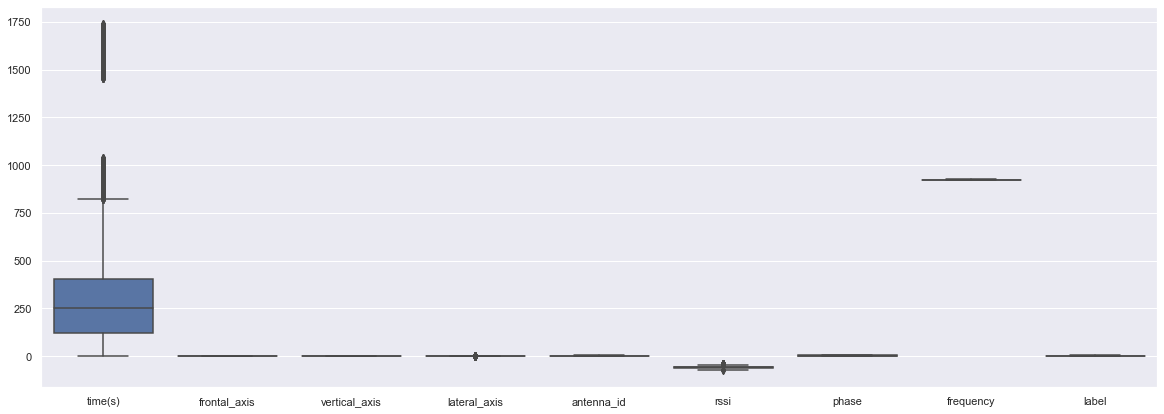

In [10]:
# boxplot - outlier finding and removal using percentile calculation
sns.boxplot(data=combined_df)

In [11]:
# def outlier_removal(df):
#         def outlier_limits(col):
#             Q3, Q1 = np.nanpercentile(col, [75,25])
#             IQR= Q3-Q1
#             UL= Q3+1.5*IQR
#             LL= Q1-1.5*IQR
#             #print(col)
#             #print('UL{}, LL{}'.format(UL,LL))
#             return UL, LL

#         for column in df.select_dtypes(include=np.number).columns:
#                 UL, LL= outlier_limits(df[column])
#                 df[column]= np.where((df[column] > UL) | (df[column] < LL), np.nan, df[column])

#         return df
    
# combined_df_outlier = outlier_removal(combined_df)
# combined_df_outlier.isnull().sum()

In [12]:
# Outlier processing methods

# percentile method
# Z-score method
# BOXCOX transsformation
# standard scaler
# log transformation

In [13]:
combined_df.corr()

,time(s),frontal_axis,vertical_axis,lateral_axis,antenna_id,rssi,phase,frequency,label
time(s),1.000000,-0.054807,-0.230744,-0.382835,0.094553,0.062541,-0.016397,-0.027019,0.247801
frontal_axis,-0.054807,1.000000,-0.731385,0.383599,0.164392,-0.133253,0.049638,0.063237,0.410776
vertical_axis,-0.230744,-0.731385,1.000000,0.126967,-0.276100,0.024277,-0.015085,-0.030178,-0.741459
lateral_axis,-0.382835,0.383599,0.126967,1.000000,-0.034394,-0.167141,0.064158,0.104388,-0.313856
antenna_id,0.094553,0.164392,-0.276100,-0.034394,1.000000,-0.190220,0.020096,0.048616,0.210477
rssi,0.062541,-0.133253,0.024277,-0.167141,-0.190220,1.000000,0.014749,-0.184895,0.101319
phase,-0.016397,0.049638,-0.015085,0.064158,0.020096,0.014749,1.000000,-0.044580,-0.009065
frequency,-0.027019,0.063237,-0.030178,0.104388,0.048616,-0.184895,-0.044580,1.000000,0.003270
label,0.247801,0.410776,-0.741459,-0.313856,0.210477,0.101319,-0.009065,0.003270,1.000000


<AxesSubplot:>

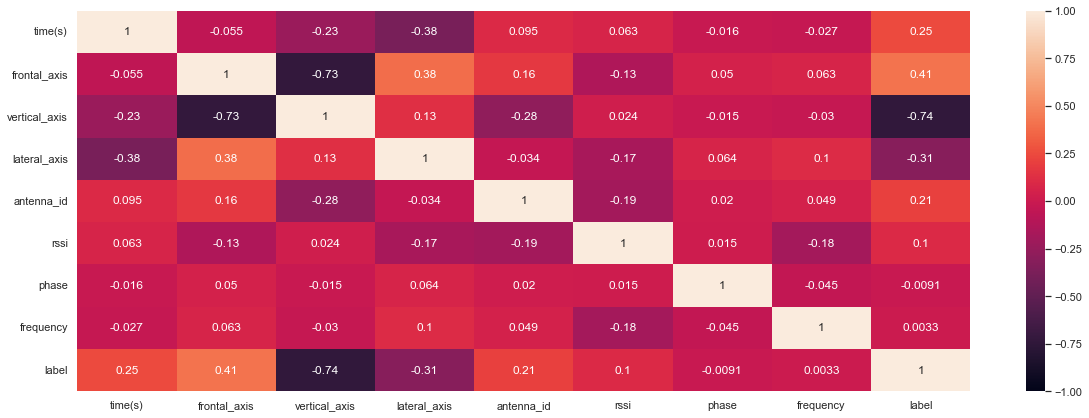

In [14]:
sns.heatmap(combined_df.corr(), annot=True, vmin=-1, vmax=1)

In [15]:
# ord_enc = OrdinalEncoder()
# combined_df["label"] = ord_enc.fit_transform(combined_df[['label']])
# combined_df

# define one hot encoding
encoder = OneHotEncoder(sparse=False, drop='first')
# transform data
onehot = encoder.fit_transform(combined_df[['gender']])
combined_df['gender'] = onehot

In [20]:
#splitting feature and target
y = combined_df['label']
y

0        1
1        1
2        1
3        1
4        1
        ..
75121    2
75122    2
75123    4
75124    4
75125    4
Name: label, Length: 75126, dtype: int64

In [21]:
X = combined_df.drop(columns=['label'])
X

,time(s),frontal_axis,vertical_axis,lateral_axis,antenna_id,rssi,phase,frequency,gender
0,0.00,0.27203,1.00820,-0.082102,1,-63.5,2.4252,924.25,1.0
1,0.50,0.27203,1.00820,-0.082102,1,-63.0,4.7369,921.75,1.0
2,1.50,0.44791,0.91636,-0.013684,1,-63.5,3.0311,923.75,1.0
3,1.75,0.44791,0.91636,-0.013684,1,-63.0,2.0371,921.25,1.0
4,2.50,0.34238,0.96229,-0.059296,1,-63.5,5.8920,920.25,1.0
...,...,...,...,...,...,...,...,...,...
75121,444.00,0.90520,0.64076,-0.082102,1,-59.5,1.9574,922.25,0.0
75122,449.00,0.90520,0.64076,-0.082102,1,-59.0,6.2540,922.25,0.0
75123,451.50,0.42446,0.91636,-0.161920,1,-53.0,5.7156,922.25,0.0
75124,451.58,0.42446,0.91636,-0.161920,1,-52.0,5.8982,922.25,0.0


In [24]:
X

,time(s),frontal_axis,vertical_axis,lateral_axis,antenna_id,rssi,phase,frequency,gender
0,0.00,0.27203,1.00820,-0.082102,1,-63.5,2.4252,924.25,1.0
1,0.50,0.27203,1.00820,-0.082102,1,-63.0,4.7369,921.75,1.0
2,1.50,0.44791,0.91636,-0.013684,1,-63.5,3.0311,923.75,1.0
3,1.75,0.44791,0.91636,-0.013684,1,-63.0,2.0371,921.25,1.0
4,2.50,0.34238,0.96229,-0.059296,1,-63.5,5.8920,920.25,1.0
...,...,...,...,...,...,...,...,...,...
75121,444.00,0.90520,0.64076,-0.082102,1,-59.5,1.9574,922.25,0.0
75122,449.00,0.90520,0.64076,-0.082102,1,-59.0,6.2540,922.25,0.0
75123,451.50,0.42446,0.91636,-0.161920,1,-53.0,5.7156,922.25,0.0
75124,451.58,0.42446,0.91636,-0.161920,1,-52.0,5.8982,922.25,0.0


In [25]:
# StandardScaler - to make normal distribution

In [26]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns= X.columns)
X_scaled_df.head()

,time(s),frontal_axis,vertical_axis,lateral_axis,antenna_id,rssi,phase,frequency,gender
0,-1.161604,-1.092959,1.582170,0.308884,-1.278914,-1.009402,-0.335462,0.940647,1.183297
1,-1.159662,-1.092959,1.582170,0.308884,-1.278914,-0.912766,0.723853,-0.548252,1.183297
2,-1.155777,-0.658239,1.363004,0.465017,-1.278914,-1.009402,-0.057814,0.642867,1.183297
3,-1.154806,-0.658239,1.363004,0.465017,-1.278914,-0.912766,-0.513305,-0.846032,1.183297
4,-1.151893,-0.919076,1.472611,0.360928,-1.278914,-1.009402,1.253166,-1.441592,1.183297


In [27]:
#ProfileReport_scaled = ProfileReport(X_scaled_df)
#ProfileReport_scaled

In [28]:
#ProfileReport_scaled.to_file('old_people_activity_recogition_classification_after_scaled.html')

<AxesSubplot:>

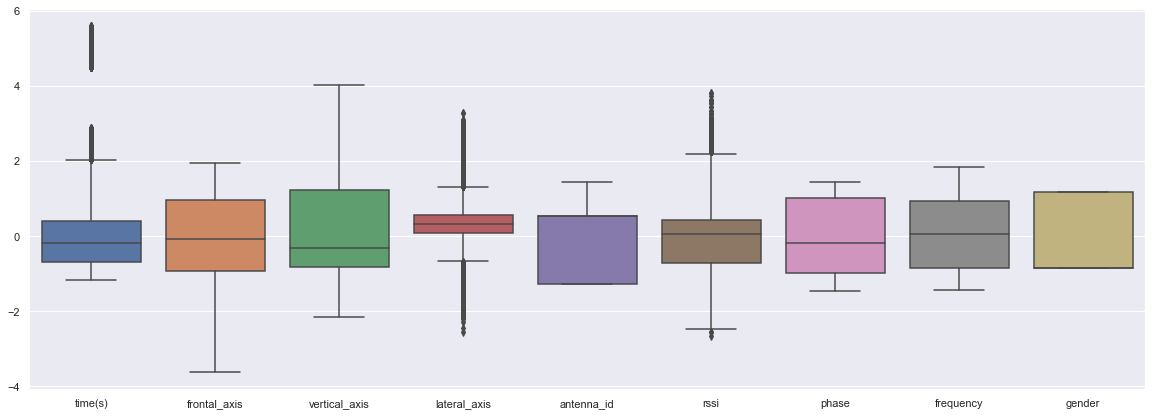

In [29]:
sns.boxplot(data = X_scaled_df)

In [30]:
#check multicoliniarity

In [31]:
X_scaled

array([[-1.16160366, -1.09295873,  1.58216986, ..., -0.33546178,
         0.94064667,  1.18329696],
       [-1.15966153, -1.09295873,  1.58216986, ...,  0.72385252,
        -0.54825241,  1.18329696],
       [-1.15577727, -0.65823897,  1.36300402, ..., -0.05781393,
         0.64286685,  1.18329696],
       ...,
       [ 0.59214041, -0.71619995,  1.36300402, ...,  1.17233238,
        -0.2504726 , -0.8450964 ],
       [ 0.59245115, -0.71619995,  1.36300402, ...,  1.25600707,
        -0.2504726 , -0.8450964 ],
       [ 0.59505361, -0.31044833,  1.25337337, ...,  1.16669602,
         1.83398611, -0.8450964 ]])

In [32]:
def vif_score(features_scaled, features_scaled_df):
    return pd.DataFrame([[features_scaled_df.columns[i], variance_inflation_factor(features_scaled,i)] for i in range(features_scaled.shape[1])], columns=["FEATURE", "VIF_SCORE"])


In [33]:
VIF_score_df = vif_score(X_scaled, X_scaled_df)
VIF_score_df

,FEATURE,VIF_SCORE
0,time(s),1.239038
1,frontal_axis,4.417169
2,vertical_axis,4.169047
3,lateral_axis,2.415555
4,antenna_id,1.166229
5,rssi,1.115573
6,phase,1.008791
7,frequency,1.048430
8,gender,1.265387


In [34]:
VIF_score_df['VIF_SCORE'] > 10

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
Name: VIF_SCORE, dtype: bool

#### VIF score for all the features are below 10, so Featues doesnot have multicollinearity. Inaddition we checked multicollinearity using df.corr() and heatmap plot

In [35]:
# train test split

In [36]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=7)

#### logistic regression

In [37]:
#default logistic model
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)
print('traning_accuracy', logistic_model.score(x_train, y_train))
print('test_accuracy', logistic_model.score(x_test, y_test))

traning_accuracy 0.9258236272878536
test_accuracy 0.9257287368561161


In [101]:
# hyperparameter tuning

default_model_logistic = LogisticRegression()

# solver - Algorithm to use in the optimization problem. Default is ‘lbfgs'
# penalty -- Specify the norm of the penalty
# C -- C parameter controls the penality strength, smaller values specify stronger regularization
grid_param_logistic = {
            'solver' : ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
            #'l1_ratio': [0.25, 0.75],
            'C': np.logspace(-3,3,7),
            'penalty': ['l1', 'l2', 'elasticnet']
}
   
#grid_logistic = GridSearchCV(estimator=default_model_logistic, param_grid=grid_param_logistic, cv=10, n_jobs=1)
grid_logistic = RandomizedSearchCV(estimator = default_model_logistic, param_distributions=grid_param_logistic, cv=10, n_jobs=1)
grid_logistic.fit(x_train, y_train)
#scoring='roc_auc'

C:\Users\jagan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jagan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jagan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1314, in fit
    raise ValueError("l1_ratio must be between 0 and 1;"
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\jagan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jagan\Anaco

C:\Users\jagan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jagan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jagan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jagan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\jagan\Anaconda3\lib\site-packages\sklearn\model_selection\_val

C:\Users\jagan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jagan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jagan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jagan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\jagan\Anaconda3\lib\site-packages\sklearn\model_sele

C:\Users\jagan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.92173045        nan 0.92387687        nan 0.92173045 0.92582363
        nan 0.92590682        nan 0.90921797]
  warnings.warn(


RandomizedSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=1,
                   param_distributions={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['liblinear', 'newton-cg',
                                                   'lbfgs', 'sag', 'saga']})

In [102]:
grid_logistic.best_params_

{'solver': 'newton-cg', 'penalty': 'l2', 'C': 10.0}

In [107]:
grid_logistic.best_estimator_

LogisticRegression(C=10.0, solver='newton-cg')

In [108]:
default_model_logistic

LogisticRegression()

In [34]:
# model with best paramrters from gridsearch cv
best_model_logistic = LogisticRegression(C = 1000.0, penalty = 'l1' , solver = 'saga')

In [35]:
best_model_logistic.fit(x_train, y_train)

LogisticRegression(C=1000.0, penalty='l1', solver='saga')

In [36]:
#training accuracy
best_model_logistic.score(x_train, y_train)

0.9258901830282862

In [37]:
#test(unknown) accuracy
best_model_logistic.score(x_test, y_test)

0.926128044722481

In [38]:
# Need to create a for loop for all models

In [39]:
#training accuracy
train_accuracy = best_model_logistic.score(x_train, y_train)
print('train_accuracy',train_accuracy)
#test(unknown) accuracy
test_accuracy = best_model_logistic.score(x_test, y_test)
print('test_accuracy',test_accuracy)
# prediction on test data
y_pred_logistic = best_model_logistic.predict(x_test)
# precision
precision = precision_score(y_test, y_pred_logistic, average='weighted')
print('precision',precision)
#recall
recall = recall_score(y_test, y_pred_logistic, average='weighted')
print('recall',recall)
# f1-score
f1 = f1_score(y_test, y_pred_logistic, average='weighted')
print('f1',f1)
# auc score
# average='weighted' -- Calculate metrics for each label, and find their average, weighted 
# by support (the number of true instances for each label)
# average='macro' For  imbalance dataset, this is not a good option as it is  assigns equal weights to the 
# score calculated for each label
# same for precision_score, recall_score and f1_score
# multi_class='ovr'one-vs-rest (OvR) algorithm computes the average of the ROC AUC scores for each class 
    #against all other classes
auc = roc_auc_score(y_test, best_model_logistic.predict_proba(x_test), multi_class='ovr', average='weighted')
print('auc', auc)
#roc_list.append([score_test_data, auc,accuracy,precision,recall])

train_accuracy 0.9258901830282862
test_accuracy 0.926128044722481
precision 0.9259961645293169
recall 0.926128044722481
f1 0.9156439249504852
auc 0.9870965808489922


In [40]:
# #after confirming the best classification model

# #save the model
# file = 'activity_recognition_logistic_reg.sav'
# pickle.dump(final_model,open(file,'wb'))

# #confusion matrix
# cm = confusion_matrix(y_test,y_pred_new)
# cm

# #visualizing confusion matrix
# plt.figure(figsize = (20,11))
# sns.heatmap(cm, annot=True, fmt="d")
# plt.xlabel('Predicted')
# plt.ylabel('Truth')

# #classification report
# #target wise precision  recall  f1-score 
# print(classification_report(y_test,y_pred_new))

In [41]:
#template

#default model
#training and testing accuracy

# hyperparameter tuning
# best_params_
# model with best paramrters from gridsearch cv
# fit
# training accuracy
# test(unknown) accuracy

# evaluation metrics
# training accuracy
# test(unknown) accuracy
# prediction on test data
# precision
# recall
# f1-score
# auc score


#### decision tree

In [41]:
#DT

default_model_dt = DecisionTreeClassifier()

#training and testing accuracy
default_model_dt.fit(x_train, y_train)
print('traning_accuracy', default_model_dt.score(x_train, y_train))
print('test_accuracy', default_model_dt.score(x_test, y_test))

traning_accuracy 1.0
test_accuracy 0.9862238786104086


In [43]:
# hyperparameter tuning
# https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680
# https://www.projectpro.io/recipes/optimize-hyper-parameters-of-decisiontree-model-using-grid-search-in-python
    
# criterion -- The function to measure the quality of a split
# splitter -- The strategy used to choose the split at each node.
                # for a tree with few features without any overfitting, I would go with the “best” splitter to be safe 
                # so that you get the best possible model architecture
# max_depth -- The maximum depth of the tree.
                #In general, the deeper you allow your tree to grow, the more complex your model will become 
                # because you will have more splits and it captures more information about the data and this is one 
                # of the root causes of overfitting. if your model is overfitting, reducing the number for max_depth is one
                # way to combat overfitting.Too low values can also lead to under-fitting
# min_samples_split -- The minimum number of samples required to split an internal node.
                # the ideal min_samples_split values tend to be between 1 to 40 for the CART algorithm which is the 
                # algorithm implemented in scikit-learn. min_samples_split is used to control over-fitting
                # Too high values can also lead to under-fitting
# min_samples_leaf -- The minimum number of samples required to be at a leaf node
                     #leaf node is a node without any children.ideal min_samples_leaf values tend to be 
                     #between 1 to 20 for the CART algorithm
# max_features -- The number of features to consider when looking for the best split
                  # If None, then max_features=n_features
                  # If “sqrt”, then max_features=sqrt(n_features).
                  # If “log2”, then max_features=log2(n_features).
                  # if you have a high computational cost or you have a lot of overfitting, you can try with “log2” 
                  # and depending on what that produces, you can either bring it slightly up using sqrt
                    
# class_weight -- Weights associated with classes in the form {class_label: weight}. If not given, 
                  # all classes are supposed to have weight one
                  # The "balanced" mode uses the values of y to automatically adjust weights inversely proportional 
                  # to class frequencies in the input data as ``n_samples / (n_classes * np.bincount(y))
#ccp_alpha -->   is a threshold, complexity of any branch more than this will be removed (we can use for overfitted model)
                 # pruning(post pruning) using ccp_alphaa..
### summary:
#The Decision tree complexity has a crucial effect on its accuracy and it is explicitly controlled 
#by the stopping criteria used and the pruning method employed. Usually, the tree complexity is measured 
#by one of the following metrics: the total number of nodes, total number of leaves, 
# tree depth and number of attributes used [8]. max_depth, min_samples_split, and min_samples_leaf are 
#all stopping criteria whereas min_weight_fraction_leaf and min_impurity_decrease are pruning methods.
            
grid_param_dt = {
             "criterion":['gini','entropy'],
             "splitter":['best','random'],
             "max_depth" : [2, 3, 5, 10, 20],
             "min_samples_split":range(2,40,3),
             "min_samples_leaf":range(1,10,2),
             'ccp_alpha':np.random.rand(5),
             'max_features': [None],
             'class_weight': [None, 'balanced']
             }

grid_dt = RandomizedSearchCV(estimator = default_model_dt, param_distributions=grid_param_dt, cv=10, n_jobs=1)
grid_dt.fit(x_train, y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=1,
                   param_distributions={'ccp_alpha': array([5.17396622e-01, 4.21091132e-01, 3.41368395e-01, 8.28208867e-05,
       6.73955990e-01]),
                                        'class_weight': [None, 'balanced'],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 5, 10, 20],
                                        'max_features': [None],
                                        'min_samples_leaf': range(1, 10, 2),
                                        'min_samples_split': range(2, 40, 3),
                                        'splitter': ['best', 'random']})

In [44]:
grid_dt.best_params_

{'splitter': 'best',
 'min_samples_split': 11,
 'min_samples_leaf': 9,
 'max_features': None,
 'max_depth': 10,
 'criterion': 'entropy',
 'class_weight': None,
 'ccp_alpha': 8.282088666944354e-05}

In [45]:
# model with best paramrters from gridsearch cv
# fit
# training accuracy
# test(unknown) accuracydefault_model_dt.fit(x_train, y_train)
best_model_dt = DecisionTreeClassifier(splitter = 'best',min_samples_split = 14,min_samples_leaf = 5,max_features = None,
 max_depth=20, criterion = 'entropy', class_weight = None, ccp_alpha = 0.6425138856480279)

best_model_dt.fit(x_train, y_train)
print('traning_accuracy', best_model_dt.score(x_train, y_train))
print('test_accuracy', best_model_dt.score(x_test, y_test))


traning_accuracy 0.898036605657238
test_accuracy 0.8988420071875416


In [46]:
#training accuracy
train_accuracy = best_model_dt.score(x_train, y_train)
print('train_accuracy',train_accuracy)
#test(unknown) accuracy
test_accuracy = best_model_dt.score(x_test, y_test)
print('test_accuracy',test_accuracy)
# prediction on test data
y_pred_dt = best_model_dt.predict(x_test)
# precision
precision = precision_score(y_test, y_pred_dt, average='weighted')
print('precision',precision)
#recall
recall = recall_score(y_test, y_pred_dt, average='weighted')
print('recall',recall)
# f1-score
f1 = f1_score(y_test, y_pred_dt, average='weighted')
print('f1',f1)
# auc score
# average='weighted' -- Calculate metrics for each label, and find their average, weighted 
# by support (the number of true instances for each label)
# average='macro' For  imbalance dataset, this is not a good option as it is  assigns equal weights to the 
# score calculated for each label
# multi_class='ovr'one-vs-rest (OvR) algorithm computes the average of the ROC AUC scores for each class 
    #against all other classes
# same for precision_score, recall_score and f1_score
auc = roc_auc_score(y_test, best_model_dt.predict_proba(x_test), multi_class='ovr', average='weighted')
# y_score -- In the multiclass case, it corresponds to an array of shape `(n_samples, n_classes)` of probability estimates 
  # provided by the `predict_proba` method --> roc_auc_score(y_true,y_score)
print('auc', auc)
#roc_list.append([score_test_data, auc,accuracy,precision,recall])

train_accuracy 0.898036605657238
test_accuracy 0.8988420071875416
precision 0.8313964461004113
recall 0.8988420071875416
f1 0.8597939191865113
auc 0.964505708119017


C:\Users\jagan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Support Vector Classifier

In [47]:
from sklearn.svm import SVC

In [52]:
default_model_svc = SVC()

#training and testing accuracy
default_model_svc.fit(x_train, y_train)
print('traning_accuracy', default_model_svc.score(x_train, y_train))
print('test_accuracy', default_model_svc.score(x_test, y_test))

traning_accuracy 0.9747420965058237
test_accuracy 0.9751763609743112


In [ ]:
# https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/
# https://medium.com/all-things-ai/in-depth-parameter-tuning-for-svc-758215394769

# C -- Regularization parameter. The strength of the regularization is inversely proportional to C. 
     #Must be strictly positive. The penalty is a squared l2 penalty.
    # C is the penalty parameter of the error term. It controls the trade off between smooth decision boundary 
    #and classifying the training points correctly
    # Increasing C values may lead to overfitting the training data.
# kernel -- Specifies the kernel type to be used in the algorithm
          # kernel parameters selects the type of hyperplane used to separate the data.
          # Using ‘linear’ will use a linear hyperplane (a line in the case of 2D data). \
          # ‘rbf’ and ‘poly’ uses a non linear hyper-plane
# gamma -- parameter for non linear hyperplanes. The higher the gamma value it tries to exactly fit the training data set
grid_param_svc ={"kernel":['linear', 'poly', 'rbf', 'sigmoid' ],
        'C':[0.01,0.1,1,10,100,200,500],
        #'gamma':[.001,.1,.4,.004,.003]
    } 
#grid_svc = GridSearchCV(estimator = default_model_svc, param_grid=grid_param_svc, cv=10, n_jobs=1)
grid_svc = RandomizedSearchCV(estimator = default_model_svc, param_distributions=grid_param_svc, cv=10, n_jobs=1, verbose=2)
grid_svc.fit(x_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
grid_svc.best_params_

In [ ]:
best_model_svc = SVC(kernel = '', 'C' = )

best_model_svc.fit(x_train, y_train)
print('traning_accuracy', best_model_svc.score(x_train, y_train))
print('test_accuracy', best_model_svc.score(x_test, y_test))

In [ ]:
#training accuracy
train_accuracy = best_model_svc.score(x_train, y_train)
print('train_accuracy',train_accuracy)
#test(unknown) accuracy
test_accuracy = best_model_svc.score(x_test, y_test)
print('test_accuracy',test_accuracy)
# prediction on test data
y_pred_svc = best_model_svc.predict(x_test)
# precision
precision = precision_score(y_test, y_pred_svc, average='weighted')
print('precision',precision)
#recall
recall = recall_score(y_test, y_pred_svc, average='weighted')
print('recall',recall)
# f1-score
f1 = f1_score(y_test, y_pred_svc, average='weighted')
print('f1',f1)
# auc score
# average='weighted' -- Calculate metrics for each label, and find their average, weighted 
# by support (the number of true instances for each label)
# average='macro' For  imbalance dataset, this is not a good option as it is  assigns equal weights to the 
# score calculated for each label
# multi_class='ovr'one-vs-rest (OvR) algorithm computes the average of the ROC AUC scores for each class 
    #against all other classes
# same for precision_score, recall_score and f1_score
auc = roc_auc_score(y_test, default_model_svc.predict_proba(x_test), multi_class='ovr', average='weighted')
# y_score -- In the multiclass case, it corresponds to an array of shape `(n_samples, n_classes)` of probability estimates 
  # provided by the `predict_proba` method --> roc_auc_score(y_true,y_score)
print('auc', auc)
#roc_list.append([score_test_data, auc,accuracy,precision,recall])

#### K-Nearest Neighbors (KNN)

In [47]:
default_model_knn = KNeighborsClassifier()

#training and testing accuracy
default_model_knn.fit(x_train, y_train)
print('traning_accuracy', default_model_knn.score(x_train, y_train))
print('test_accuracy', default_model_knn.score(x_test, y_test))

traning_accuracy 0.9863394342762063
test_accuracy 0.9841607879675229


In [48]:
# hyper parameter tuning
# https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/
# https://www.kaggle.com/arunimsamudra/k-nn-with-hyperparameter-tuning

# n_neighbors -- n_neighbors represents the number of neighbors to use for kneighbors queries
# weights -- 'uniform' assigns no weight, while 'distance' weighs points by the inverse of their distances meaning 
   #nearer points will have more weight than the farther points.
# metric -- The distance metric to be used will calculating the similarity.
# p -- This is the power parameter for the Minkowski metric. When p=1, this is equivalent to using manhattan_distance(l1),
      # and euliddean_distance(l2) for p=2. For arbitrary p, minkowski distance (l_p) is used

grid_param_knn  = {
    'n_neighbors':[3,5,7,9,12,13,15,17,21],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    #'leaf_size' : [10 ,15, 20 , 25 , 30 , 35 , 45 , 50 ],
    #'p' : [1,2],
    'weights' : ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

#grid_knn = GridSearchCV(estimator=default_model_knn, param_grid=grid_param_knn, cv=10, n_jobs=1)
grid_knn = RandomizedSearchCV(estimator = default_model_knn, param_distributions=grid_param_knn, cv=10, n_jobs=1, verbose=1)
grid_knn.fit(x_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'metric': ['euclidean', 'manhattan',
                                                   'minkowski'],
                                        'n_neighbors': [3, 5, 7, 9, 12, 13, 15,
                                                        17, 21],
                                        'weights': ['uniform', 'distance']},
                   verbose=1)

In [49]:
grid_knn.best_params_

{'weights': 'uniform',
 'n_neighbors': 3,
 'metric': 'euclidean',
 'algorithm': 'ball_tree'}

In [50]:
best_model_knn = KNeighborsClassifier(weights='uniform',n_neighbors=3,metric='euclidean',algorithm='ball_tree')

best_model_knn.fit(x_train, y_train)
print('traning_accuracy', best_model_knn.score(x_train, y_train))
print('test_accuracy', best_model_knn.score(x_test, y_test))

traning_accuracy 0.9897171381031614
test_accuracy 0.986090775988287


In [69]:
#training accuracy
train_accuracy = best_model_knn.score(x_train, y_train)
print('train_accuracy',train_accuracy)
#test(unknown) accuracy
test_accuracy = best_model_knn.score(x_test, y_test)
print('test_accuracy',test_accuracy)
# prediction on test data
y_pred_knn = best_model_knn.predict(x_test)
# precision
precision = precision_score(y_test, y_pred_knn, average='weighted')
print('precision',precision)
#recall
recall = recall_score(y_test, y_pred_knn, average='weighted')
print('recall',recall)
# f1-score
f1 = f1_score(y_test, y_pred_knn, average='weighted')
print('f1',f1)
# auc score
# average='weighted' -- Calculate metrics for each label, and find their average, weighted 
# by support (the number of true instances for each label)
# average='macro' For  imbalance dataset, this is not a good option as it is  assigns equal weights to the 
# score calculated for each label
# multi_class='ovr'one-vs-rest (OvR) algorithm computes the average of the ROC AUC scores for each class 
    #against all other classes
# same for precision_score, recall_score and f1_score
auc = roc_auc_score(y_test, best_model_knn.predict_proba(x_test), multi_class='ovr', average='weighted')
# y_score -- In the multiclass case, it corresponds to an array of shape `(n_samples, n_classes)` of probability estimates 
  # provided by the `predict_proba` method --> roc_auc_score(y_true,y_score)
print('auc', auc)
#roc_list.append([score_test_data, auc,accuracy,precision,recall])

NameError: name 'best_model_knn' is not defined

#### bagging classifier

In [42]:
default_bag_dt = BaggingClassifier(DecisionTreeClassifier())

#training and testing accuracy
default_bag_dt.fit(x_train, y_train)
print('traning_accuracy', default_bag_dt.score(x_train, y_train))
print('test_accuracy', default_bag_dt.score(x_test, y_test))

traning_accuracy 0.998801996672213
test_accuracy 0.99035005989618


In [43]:
# hyper tuning parameter
#https://stackoverflow.com/questions/47570307/tuning-parameters-of-the-classifier-used-by-baggingclassifier
grid_param_bag_dt = {
        'n_estimators': [10,50,250,1000],
        'base_estimator__criterion':['gini','entropy'],
        'base_estimator__splitter':['best','random'],
        'base_estimator__max_depth' : [2, 3, 5, 10, 20],
        'base_estimator__min_samples_split':range(2,40,3),
        'base_estimator__min_samples_leaf':range(1,10,2),
        'base_estimator__ccp_alpha':np.random.rand(5),
        'base_estimator__max_features': [None],
        'base_estimator__class_weight': [None, 'balanced']
}

#grid_bag_svc = GridSearchCV(estimator=default_bag_svc, param_grid=grid_param_bag_svc, cv=10, n_jobs=1)
grid_bag_dt = RandomizedSearchCV(estimator=default_bag_dt, param_distributions=grid_param_bag_dt, cv=10, n_jobs=1)
grid_bag_dt.fit(x_train, y_train)

RandomizedSearchCV(cv=10,
                   estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier()),
                   n_jobs=1,
                   param_distributions={'base_estimator__ccp_alpha': array([0.77812581, 0.62374518, 0.60262702, 0.26718453, 0.31793233]),
                                        'base_estimator__class_weight': [None,
                                                                         'balanced'],
                                        'base_estimator__criterion': ['gini',
                                                                      'entropy'],
                                        'base_estimator__max_depth': [2, 3, 5,
                                                                      10, 20],
                                        'base_estimator__max_features': [None],
                                        'base_estimator__min_samples_leaf': range(1, 10, 2),
                                        'base_estimator__min_s

In [44]:
grid_bag_dt.best_params_

{'n_estimators': 50,
 'base_estimator__splitter': 'best',
 'base_estimator__min_samples_split': 38,
 'base_estimator__min_samples_leaf': 7,
 'base_estimator__max_features': None,
 'base_estimator__max_depth': 3,
 'base_estimator__criterion': 'entropy',
 'base_estimator__class_weight': None,
 'base_estimator__ccp_alpha': 0.2671845277876821}

In [47]:
best_model_bag_dt = BaggingClassifier(DecisionTreeClassifier(splitter='best',min_samples_split =38 ,min_samples_leaf = 7,
            max_features=None , max_depth=3, criterion='entropy' , class_weight=None , ccp_alpha=0.2671845277876821), 
            n_estimators=50 )

# DecisionTreeClassifier(splitter = 'best',min_samples_split = 14,min_samples_leaf = 5,max_features = None,
#  max_depth=20, criterion = 'entropy', class_weight = None, ccp_alpha = 0.6425138856480279)

best_model_bag_dt.fit(x_train, y_train)
print('traning_accuracy', best_model_bag_dt.score(x_train, y_train))
print('test_accuracy', best_model_bag_dt.score(x_test, y_test))

traning_accuracy 0.898036605657238
test_accuracy 0.8988420071875416


In [48]:
#training accuracy
train_accuracy = best_model_bag_dt.score(x_train, y_train)
print('train_accuracy',train_accuracy)
#test(unknown) accuracy
test_accuracy = best_model_bag_dt.score(x_test, y_test)
print('test_accuracy',test_accuracy)
# prediction on test data
y_pred_bag_dt = best_model_bag_dt.predict(x_test)
# precision
precision = precision_score(y_test, y_pred_bag_dt, average='weighted')
print('precision',precision)
#recall
recall = recall_score(y_test, y_pred_bag_dt, average='weighted')
print('recall',recall)
# f1-score
f1 = f1_score(y_test, y_pred_bag_dt, average='weighted')
print('f1',f1)
# auc score
# average='weighted' -- Calculate metrics for each label, and find their average, weighted 
# by support (the number of true instances for each label)
# average='macro' For  imbalance dataset, this is not a good option as it is  assigns equal weights to the 
# score calculated for each label
# multi_class='ovr'one-vs-rest (OvR) algorithm computes the average of the ROC AUC scores for each class 
    #against all other classes
# same for precision_score, recall_score and f1_score
auc = roc_auc_score(y_test, best_model_bag_dt.predict_proba(x_test), multi_class='ovr', average='weighted')
# y_score -- In the multiclass case, it corresponds to an array of shape `(n_samples, n_classes)` of probability estimates 
  # provided by the `predict_proba` method --> roc_auc_score(y_true,y_score)
print('auc', auc)
#roc_list.append([score_test_data, auc,accuracy,precision,recall])

train_accuracy 0.898036605657238
test_accuracy 0.8988420071875416


C:\Users\jagan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


precision 0.8313964461004113
recall 0.8988420071875416
f1 0.8597939191865113
auc 0.9646323014303491


#### stacking

In [51]:
#splitting datset for stacking

#split-1
x_train_1 , x_test_1 , y_train_1 , y_test_1  = train_test_split(X_scaled,y,test_size = .50 , random_state = 7)

#split-2
x_train_2 , x_test_2 , y_train_2, y_test_2 = train_test_split(x_train_1 ,y_train_1,random_state = 77 , test_size = .20)

In [52]:
#model 1
# need to use split-2 values
knn_hier_1 = KNeighborsClassifier(weights='uniform',n_neighbors=3,metric='euclidean',algorithm='ball_tree') 
knn_hier_1.fit(x_train_2,y_train_2)
knn_hier_1.score(x_test_2,y_test_2)

0.9793690935711433

In [53]:
# model 2
# need to use split-2 values
svc_hier_1 = SVC()
svc_hier_1.fit(x_train_2,y_train_2)
svc_hier_1.score(x_test_2,y_test_2)

0.9691201916677759

In [54]:
# prediction of model 1 and model 2
# need to use split-1 test values
predcition_knn_hier_1 = knn_hier_1.predict(x_test_1)
prediction_svc_hier_1 = svc_hier_1.predict(x_test_1)

In [55]:
predcition_knn_hier_1

array([3, 1, 3, ..., 3, 2, 3], dtype=int64)

In [56]:
prediction_svc_hier_1

array([3, 1, 3, ..., 3, 2, 3], dtype=int64)

In [57]:
input_hier_2_x = np.column_stack((predcition_knn_hier_1,prediction_svc_hier_1))
pd.DataFrame(input_hier_2_x)

,0,1
0,3,3
1,1,1
2,3,3
3,1,1
4,3,3
...,...,...
37558,3,3
37559,3,3
37560,3,3
37561,2,2


In [58]:
input_hier_2_y = y_test_1
input_hier_2_y

12924    3
8420     1
57400    3
17964    1
27849    3
        ..
23448    3
63745    3
20691    3
19840    2
72017    3
Name: label, Length: 37563, dtype: int64

In [59]:
# model 3
rf_hier_2 = RandomForestClassifier()
rf_hier_2.fit(input_hier_2_x,input_hier_2_y)

RandomForestClassifier()

In [ ]:
#knn
#svc
#rf

In [ ]:
#test stack

In [60]:
knn_hier_1_output_test = knn_hier_1.predict(x_test_2)
svc_hier_1_output_test = svc_hier_1.predict(x_test_2)

In [61]:
output_stack1 = np.column_stack ((knn_hier_1_output_test,svc_hier_1_output_test))

In [62]:
rf_hier_2.predict(output_stack1)

array([3, 3, 3, ..., 3, 3, 1], dtype=int64)

In [63]:
rf_hier_2.score(output_stack1 , y_test_2)

0.97990150405963

In [ ]:
# do we need to find the best params through grid search ?
# then create the model with best params ? 
# then we can find accuracy precision, recall auc for the fina stack model ?

In [68]:
#training accuracy
train_accuracy = rf_hier_2.score(input_hier_2_x,input_hier_2_y)
print('train_accuracy',train_accuracy)
#test(unknown) accuracy
test_accuracy = rf_hier_2.score(output_stack1, y_test_2)
print('test_accuracy',test_accuracy)
# prediction on test data
y_pred_rf_hier_2 = rf_hier_2.predict(output_stack1)
# precision
precision = precision_score(y_test_2, y_pred_rf_hier_2, average='weighted')
print('precision',precision)
#recall
recall = recall_score(y_test_2, y_pred_rf_hier_2, average='weighted')
print('recall',recall)
# f1-score
f1 = f1_score(y_test_2, y_pred_rf_hier_2, average='weighted')
print('f1',f1)
# auc score
# average='weighted' -- Calculate metrics for each label, and find their average, weighted 
# by support (the number of true instances for each label)
# average='macro' For  imbalance dataset, this is not a good option as it is  assigns equal weights to the 
# score calculated for each label
# multi_class='ovr'one-vs-rest (OvR) algorithm computes the average of the ROC AUC scores for each class 
    #against all other classes
# same for precision_score, recall_score and f1_score
auc = roc_auc_score(y_test_2, rf_hier_2.predict_proba(output_stack1), multi_class='ovr', average='weighted')
# y_score -- In the multiclass case, it corresponds to an array of shape `(n_samples, n_classes)` of probability estimates 
  # provided by the `predict_proba` method --> roc_auc_score(y_true,y_score)
print('auc', auc)
#roc_list.append([score_test_data, auc,accuracy,precision,recall])

train_accuracy 0.9815243723877219
test_accuracy 0.97990150405963
precision 0.9791242138632746
recall 0.97990150405963
f1 0.9791209242981198
auc 0.9938382272919101


### ROUGH WORK

In [ ]:
# ***********************************************************************************************

In [ ]:
#applying gridsearchcv to find mean test score

# C -> regularization parameter
#n_jobs=-1 -> It will consume all the cores if not specified it will consume only one core

solver_list = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
parameters = dict(solver=solver_list)
lr = LogisticRegression(random_state=7, multi_class="auto", n_jobs=-1, C=1)
clf = GridSearchCV(lr, parameters, cv=5)
clf.fit(x_train, y_train)
scores = clf.cv_results_['mean_test_score']

In [ ]:
eval_df = pd.DataFrame(solver_list,columns=['solver'])
eval_df['grid_search_mean_test_score'] = scores
eval_df

In [ ]:
# auc score
# we can do this in above for lr model and loop, but for learning purpose have done like this
# roc_auc_score requires predict_proba(x), not predicted value
# 'auto’ selects ‘ovr’ if the data is binary, or if solver=’liblinear’, and otherwise selects ‘multinomial’.

roc_list = []
solvers = ['liblinear','newton-cg', 'sag', 'saga', 'lbfgs']

for sol in solvers: 

    logreg = LogisticRegression(random_state=7, multi_class="auto", n_jobs=-1, C=1)
    logreg.fit(x_train, y_train)
    y_pred = logreg.predict(x_test)
    auc = roc_auc_score(y_test, logreg.predict_proba(x_test), multi_class='ovr')
    score_test_data = logreg.score(x_test, y_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    roc_list.append([score_test_data, auc,accuracy,precision,recall])
    

In [ ]:
eval_df[['score_test_data','roc_auc_score', 'accuracy','precision','recall']] = roc_list
eval_df

In [ ]:
#saga performs well compared with other solvers
#so, creating final model using saga solver

In [ ]:
final_model = LogisticRegression(solver='saga', multi_class='auto')
final_model.fit(x_train, y_train)
y_pred_new = final_model.predict(x_test)

In [ ]:
#save the model
file = 'activity_recognition_logistic_reg.sav'
pickle.dump(final_model,open(file,'wb'))

In [ ]:
cm = confusion_matrix(y_test,y_pred_new)
cm

In [ ]:
#visualizing confusion matrix
plt.figure(figsize = (20,11))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
#classification report
#target wise precision  recall  f1-score 
print(classification_report(y_test,y_pred_new))

#### After finding best params value for each model, we can find train score using train dataset \
#### then we can find score using test set, then accuracy score, precision, recall, auc_roc etc
#### based on that we will decide the model

In [ ]:
# then confusion matrix, classification report

In [ ]:
#bagging finding no.of estimators for Bagging and finding best params for that particular model, maybe tricky

#as of now, idea will be seperate(standalone) model will use GRIDSEARHCV anf find best params, 
  # using those params we will send the details to the model inside bagging
    #bagging(decisionTree(best_params_from_grid_search_cv))

In [55]:
for col in combined_df.select_dtypes(include=np.number).columns:
    print(col)

time(s)
frontal_axis
vertical_axis
lateral_axis
antenna_id
rssi
phase
frequency
label


In [57]:
df_1  = pd.DataFrame({"fruit":["apple", "banana", "musk melon",
                             "watermelon", "pineapple", "custard apple"],
                   "color": ["red", "green/yellow", "white",
                            "green", "yellow", "green"]})

In [61]:
df_1

,fruit,color
0,apple,red
1,banana,green/yellow
2,musk melon,white
3,watermelon,green
4,pineapple,yellow
5,custard apple,green


In [69]:
df_1['fruit'] = np.where(df_1['fruit'] == 'apple', np.nan, df_1['fruit'] )

In [70]:
df_1

,fruit,color
0,NaN,red
1,banana,green/yellow
2,musk melon,white
3,watermelon,green
4,pineapple,yellow
5,custard apple,green


In [110]:
from sklearn.linear_model import LogisticRegression
import numpy as np
#import seaborn as sns

In [111]:
best_param_logistic_test = {'solver': 'newton-cg', 'C': 10.0}

In [118]:
best_param_logistic_test

{'solver': 'newton-cg', 'C': 10.0}

In [134]:
l1 = LogisticRegression(**best_param_logistic_test)

In [135]:
l1.fit(x_train, y_train)

LogisticRegression(C=10.0, solver='newton-cg')

In [136]:
l1.score(x_train, y_train)

0.9259068219633944

In [139]:
l1.get_params()

{'C': 10.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'newton-cg',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
best_model_logistic_test.set_params(**knn_gridsearch_model.best_params_)

In [132]:
new_knn_model = KNeighborsClassifier(**knn_gridsearch_model.best_params_)

solver=newton-cg


TypeError: can only concatenate str (not "float") to str

In [113]:
best_model_logistic_test

LogisticRegression(penalty={'C': 10.0, 'solver': 'newton-cg'})

In [114]:
best_model_logistic_test.fit(x_train, y_train)

ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got {'solver': 'newton-cg', 'C': 10.0}.

In [42]:
import pandas as pd
import numpy as np

# 				4				3	1.0
# json_ = {
#     "time(s)": 0.00,
#     "frontal_axis": 0.27203,
#     "vertical_axis": 1.00820,
#     "lateral_axis": -0.082102,
#     "antenna_id": 1,
#     "rssi": -63.5,
#     "phase": 2.4252,
#     "frequency": 924.25,
#     "gender": "M"
# }

json_ = {
    "time(s)": 37.75,
    "frontal_axis": 1.069400,
    "vertical_axis": 0.296270,
    "lateral_axis": -0.013684,
    "antenna_id": 4,
    "rssi": -67.0,
    "phase": 1.032400,
    "frequency": 925.75,
    "gender": "M"
}

data = {'name': ['nick', 'david', 'joe', 'ross'],
        'age': ['5', '10', '7', '6']}

query_df = pd.DataFrame([json_])

In [43]:
query_df

,time(s),frontal_axis,vertical_axis,lateral_axis,antenna_id,rssi,phase,frequency,gender
0,37.75,1.0694,0.29627,-0.013684,4,-67.0,1.0324,925.75,M


In [44]:
# transform new data
# needs to save the encoder model as well, then load that model and transform it into encoding
onehot_new = encoder.transform(query_df[['gender']])
query_df['gender'] = onehot_new

In [45]:
query_df

,time(s),frontal_axis,vertical_axis,lateral_axis,antenna_id,rssi,phase,frequency,gender
0,37.75,1.0694,0.29627,-0.013684,4,-67.0,1.0324,925.75,1.0


In [46]:
#StandardScaler
query_df_scaled = scalar.transform(query_df)
query_df_scaled

array([[-1.01497279,  0.87788786, -0.11677109,  0.46501716,  1.4429926 ,
        -1.68586004, -0.97369898,  1.83398611,  1.18329696]])

In [47]:
#default logistic model
logistic_model.predict(query_df_scaled)

array([3], dtype=int64)

In [49]:
activity_prediction = logistic_model.predict(query_df_scaled)
activity_prediction

array([3], dtype=int64)

In [50]:
activity_prediction[0]

3

In [51]:
type(activity_prediction[0])

numpy.int64

In [53]:
type(int(activity_prediction[0]))

int